In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import layers as k
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import heartpy as hp
import matplotlib.pyplot as plt

# Read in Data

In [2]:
data_AS = pd.read_csv('finalData/preprocessedDREAMER_V2.csv', index_col='Unnamed: 0')
labels_AS = pd.read_csv('finalData/ascertain_labels_Final.csv').T.values.tolist()[0]

data_DR = pd.read_csv('finalData/DREAMER_data_final.csv', index_col='Unnamed: 0')
labels_DR = pd.read_csv('finalData/DREAMER_labels_final.csv').T.values.tolist()[0]

In [3]:
len(labels_AS), data_AS.shape, len(labels_DR), data_DR.shape

(653, (13, 653), 320, (13, 320))

In [4]:
data_AS.head(13)

,P01C1,P01C2,P01C3,P01C4,P01C5,P01C6,P01C7,P01C8,P01C9,P01C10,...,P55C26,P55C28,P55C29,P55C30,P55C31,P55C33,P55C34,P55C35,P55C36,P57C11
hr,74.092558,78.502305,78.829322,74.392216,76.332158,70.747185,77.374066,76.717180,73.731932,80.140302,...,78.063892,69.857874,77.228112,76.800000,75.702857,77.008565,76.117812,71.281805,76.745182,453.205742
ibi,809.797932,764.308764,761.138091,806.535993,786.038306,848.090278,775.453629,782.093395,813.758681,748.686975,...,768.601190,858.886719,776.919158,781.250000,792.572464,779.134115,788.251769,841.729526,781.808036,132.390203
sdnn,45.632772,29.789658,53.148914,53.795742,41.553153,32.992637,29.301007,37.483391,32.530346,27.319248,...,33.837810,185.880021,37.804367,18.805448,41.819302,46.232841,54.043326,127.886348,55.530707,145.462111
sdsd,28.256993,15.673158,16.851010,27.540715,20.683491,18.693287,15.735633,15.745813,16.814110,15.020118,...,6.639348,17.578125,12.303410,15.733133,15.645332,24.931050,19.043904,81.365518,24.566152,153.180947
rmssd,45.034850,30.517031,33.656399,43.233470,39.847168,35.975623,31.603297,31.126282,35.524947,27.580497,...,12.352647,27.759122,23.328741,24.079742,26.577336,35.934315,31.063685,122.849078,36.602953,220.338020
pnn20,0.679389,0.626374,0.625000,0.657658,0.685950,0.639344,0.609756,0.574713,0.741573,0.504348,...,0.000000,0.500000,0.444444,0.333333,0.479167,0.375000,0.543478,0.750000,0.446429,0.757576
pnn50,0.221374,0.087912,0.111111,0.243243,0.223140,0.180328,0.081301,0.103448,0.146067,0.034783,...,0.000000,0.000000,0.037037,0.000000,0.020833,0.250000,0.065217,0.687500,0.160714,0.575758
hr_mad,27.343750,17.578125,35.156250,27.343750,27.343750,27.343750,19.531250,27.343750,23.437500,19.531250,...,19.531250,33.203125,21.484375,11.718750,35.156250,31.250000,35.156250,93.750000,35.156250,46.875000
sd1,31.842660,21.562056,23.796163,30.563296,28.174640,25.425547,22.346624,21.996411,25.117611,19.501632,...,8.734641,12.429611,15.184771,12.110075,18.571456,20.620852,21.965261,85.948423,25.879893,155.595165
sd2,53.657112,35.090148,69.522041,69.609890,50.566904,38.196432,35.073113,47.568266,38.439916,32.017703,...,42.192322,12.429611,52.866729,19.070076,57.544958,59.135476,73.794231,168.735528,71.842611,139.744323


10000

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d3879c5fa0>,
 0.8775510204081632)

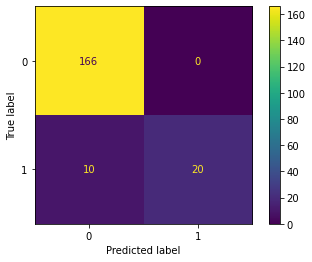

In [5]:
numIter = 0
acc = 0
maxAcc = 0
splitTuple = (0,0,0,0)
while(acc<0.95 and numIter< 10000):
    X_train, X_test, y_train, y_test = train_test_split(data_AS.T, labels_AS, test_size=0.3, stratify=labels_AS)

    rfModel = RandomForestClassifier()
    # rfModel = load('rf.joblib')
    rfModel.fit(X_train, y_train)
    acc = rfModel.score(X_test, y_test)
    numIter += 1
    print('\r' + str(numIter), end='')
    if(acc > maxAcc):
        maxAcc = acc
        splitTuple = (X_train, X_test, y_train, y_test)

plot_confusion_matrix(rfModel, splitTuple[1], splitTuple[3]), maxAcc

10000

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d387d64af0>,
 0.9166666666666666)

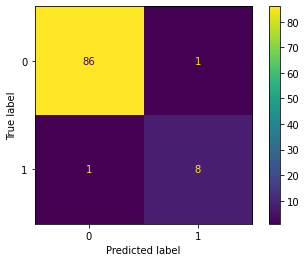

In [6]:
numIter = 0
acc = 0
maxAcc2 = 0
splitTuple2 = (0,0,0,0)
while(acc<0.95 and numIter< 10000):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(data_DR.T, labels_DR, test_size=0.3, stratify=labels_DR)

    rfModel2 = RandomForestClassifier()
    # rfModel = load('rf.joblib')
    rfModel2.fit(X_train2, y_train2)
    acc = rfModel2.score(X_test2, y_test2)
    numIter += 1
    print('\r' + str(numIter), end='')
    if(acc > maxAcc2):
        maxAcc2 = acc
        splitTuple2 = (X_train2, X_test2, y_train2, y_test2)


plot_confusion_matrix(rfModel2, splitTuple2[1], splitTuple2[3]), maxAcc2

In [7]:
labels_combined = labels_AS + labels_DR
dataCombined = pd.concat([data_AS.T, data_DR.T]).T

10000

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d387e0f970>,
 0.886986301369863)

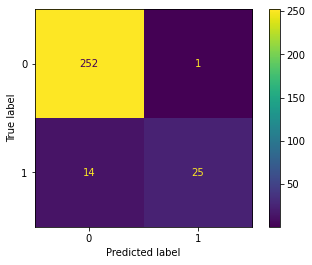

In [8]:
numIter = 0
acc = 0
maxAcc3 = 0
splitTuple3 = (0,0,0,0)
while(acc<0.95 and numIter< 10000):
    X_train3, X_test3, y_train3, y_test3 = train_test_split(dataCombined.T, labels_combined, test_size=0.3, stratify=labels_combined)

    rfModel3 = RandomForestClassifier()
    # rfModel = load('rf.joblib')
    rfModel3.fit(X_train3, y_train3)
    acc = rfModel3.score(X_test3, y_test3)
    numIter += 1
    print('\r' + str(numIter), end='')
    if(acc > maxAcc3):
        maxAcc3 = acc
        splitTuple3 = (X_train3, X_test3, y_train3, y_test3)

plot_confusion_matrix(rfModel3, splitTuple3[1], splitTuple3[3]), maxAcc3

# Model Comparison

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

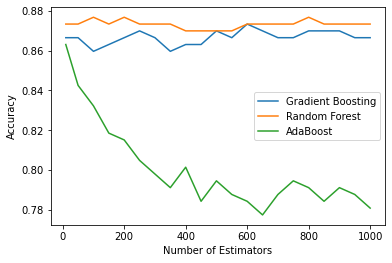

In [10]:
X_train, X_test, y_train, y_test = splitTuple3

numEstimators = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]


gradBoostScores = []
rfScores = []
adaScores = []

for num in numEstimators:
    gradModel = GradientBoostingClassifier(n_estimators=num, random_state=7)
    rfModel = RandomForestClassifier(n_estimators=num, random_state=7)
    adaModel = AdaBoostClassifier(n_estimators=num, random_state=7)

    
    gradModel.fit(X_train, y_train)
    rfModel.fit(X_train, y_train)
    adaModel.fit(X_train, y_train)
    
    scores = gradModel.score(X_test, y_test)
    gradBoostScores.append(scores)
    scores = rfModel.score(X_test, y_test)
    rfScores.append(scores)
    scores = adaModel.score(X_test, y_test)
    adaScores.append(scores)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(numEstimators, gradBoostScores, label = "Gradient Boosting")
ax.plot(numEstimators, rfScores, label = "Random Forest")
ax.plot(numEstimators, adaScores, label="AdaBoost")


plt.legend()

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Accuracy')

plt.show()


In [11]:
print(max(rfScores))

0.8767123287671232


In [30]:
mlp = MLPClassifier().fit(X_train, y_train)
scoresMLP = mlp.score(X_test, y_test)

scoresMLP

0.8664383561643836

Text(0, 0.5, 'Loss')

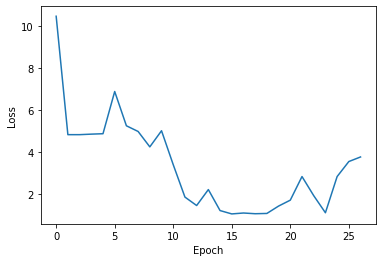

In [33]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')